In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
tes = pd.read_csv('../Capstone_csv_file/tes_td_salary_17-18')

In [3]:
tes.dtypes

NAME        object
TD           int64
TD_rank    float64
salary       int64
dtype: object

In [4]:
tes.head()

,NAME,TD,TD_rank,salary
0,Jimmy Graham,10,1.0,10000000
1,Rob Gronkowski,8,3.5,9000000
2,Zach Ertz,8,3.5,8500000
3,Kyle Rudolph,8,3.5,7300000
4,Travis Kelce,8,3.5,9368400


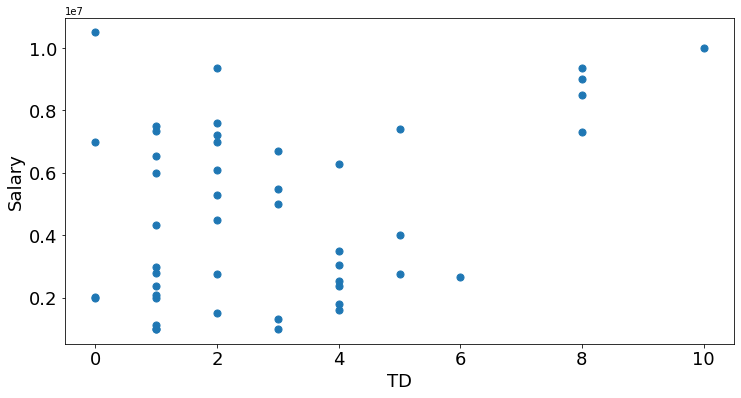

In [5]:
ax = tes.plot(kind="scatter", x = 'TD',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('TD', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(tes.loc[:, ['TD', 'salary']])

In [7]:
X.mean(axis = 0)

array([6.61409461e-17, 7.08652994e-18])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.79357551, -0.91578289],
       [ 2.27315296,  1.47306803],
       [ 0.52504238, -0.82135852],
       [-0.71069096,  1.03347118],
       [ 0.03527002,  0.40500866]])

In [11]:
km.predict(X)

array([1, 1, 1, 1, 1, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 0,
       3, 3, 0, 4, 3, 4, 4, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0,
       3, 3, 0], dtype=int32)

In [12]:
tes['clusters'] = km.labels_
tes.head()

,NAME,TD,TD_rank,salary,clusters
0,Jimmy Graham,10,1.0,10000000,1
1,Rob Gronkowski,8,3.5,9000000,1
2,Zach Ertz,8,3.5,8500000,1
3,Kyle Rudolph,8,3.5,7300000,1
4,Travis Kelce,8,3.5,9368400,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[1.00000000e+00, 2.15680462e+06],
       [8.40000000e+00, 8.83368000e+06],
       [4.18181818e+00, 2.42072218e+06],
       [1.20000000e+00, 7.60500000e+06],
       [3.00000000e+00, 5.84843750e+06]])

In [14]:
tes.groupby('clusters')[['TD', 'salary']].mean()

,TD,salary
clusters,,
0,1.000000,2.156805e+06
1,8.400000,8.833680e+06
2,4.181818,2.420722e+06
3,1.200000,7.605000e+06
4,3.000000,5.848438e+06


In [15]:
centroids = tes.groupby('clusters')[['TD', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

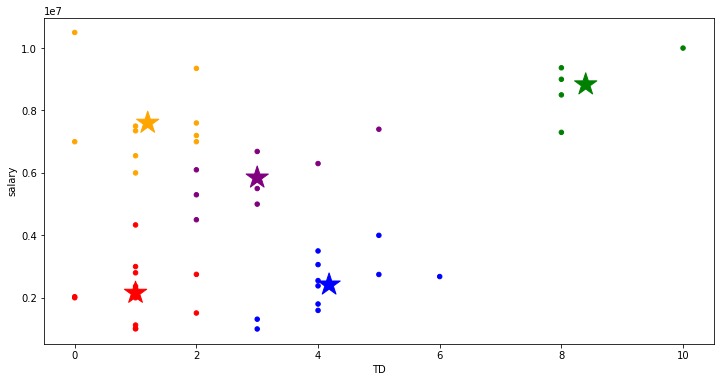

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
tes['color'] = tes['clusters'].map(lambda p: colors[p])

ax = tes.plot(    
    kind = 'scatter', 
    x = 'TD', y = 'salary',
    figsize = (12,6),
    c = tes['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'TD', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

10.717822244773068

In [18]:
silhouette_score(X, km.labels_)

0.4912156634495711